#                          Data Analysis on IPL Dataset           

<img src="https://resources.platform.iplt20.com/photo-resources/2020/08/20/8ab72598-0ed5-411d-9b91-7fc371ae2812/IPL_v1.jpg?width=200&height=133">

# Puneet Choudhary

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading all the data which are required

In [2]:
match_data=pd.read_csv("A:\\ipl dataset\\ipl dataset\\matches.csv")
home_away_data=pd.read_csv("A:\\ipl dataset\\ipl dataset\\teamwise_home_and_away.csv")
deliveries_data=pd.read_csv("A:\\ipl dataset\\ipl dataset\\deliveries.csv")
runs_data=pd.read_csv("A:\\ipl dataset\\ipl dataset\\most_runs_average_strikerate.csv")
teams_data=pd.read_csv("A:\\ipl dataset\\ipl dataset\\teams.csv")
players_data=pd.read_excel("A:\\ipl dataset\\ipl dataset\\players.xlsx")

In [3]:
match_data.head().T

,0,1,2,3,4
id,1,2,3,4,5
Season,IPL-2017,IPL-2017,IPL-2017,IPL-2017,IPL-2017
city,Hyderabad,Pune,Rajkot,Indore,Bangalore
date,05-04-2017,06-04-2017,07-04-2017,08-04-2017,08-04-2017
team1,Sunrisers Hyderabad,Mumbai Indians,Gujarat Lions,Rising Pune Supergiant,Royal Challengers Bangalore
team2,Royal Challengers Bangalore,Rising Pune Supergiant,Kolkata Knight Riders,Kings XI Punjab,Delhi Daredevils
toss_winner,Royal Challengers Bangalore,Rising Pune Supergiant,Kolkata Knight Riders,Kings XI Punjab,Royal Challengers Bangalore
toss_decision,field,field,field,field,bat
result,normal,normal,normal,normal,normal
dl_applied,0,0,0,0,0


### Seeing if there is any null values are present there not. If yes then taking nescessary steps.

In [4]:
match_data[match_data.isnull().any(axis=1)]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,IPL-2016,Delhi,25-05-2016,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,IPL-2016,Delhi,27-05-2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,IPL-2016,Bangalore,29-05-2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
744,11340,IPL-2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [5]:
match_data.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

### Dropping all the unwanted columns

In [6]:
match_data.drop(["city","player_of_match","venue","dl_applied","umpire1","umpire2","umpire3"],axis=1,inplace=True)

In [7]:
match_data.isnull().sum()

id                0
Season            0
date              0
team1             0
team2             0
toss_winner       0
toss_decision     0
result            0
winner            4
win_by_runs       0
win_by_wickets    0
dtype: int64

In [8]:
match_data.dropna(inplace=True)

In [9]:
match_data.isnull().sum()

id                0
Season            0
date              0
team1             0
team2             0
toss_winner       0
toss_decision     0
result            0
winner            0
win_by_runs       0
win_by_wickets    0
dtype: int64

### Moving different seasons into different datasets

In [10]:
match_data.Season.unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [11]:
ipl08=match_data[match_data.iloc[:,1]=="IPL-2008"]
ipl09=match_data[match_data.iloc[:,1]=="IPL-2009"]
ipl10=match_data[match_data.iloc[:,1]=="IPL-2010"]
ipl11=match_data[match_data.iloc[:,1]=="IPL-2011"]
ipl12=match_data[match_data.iloc[:,1]=="IPL-2012"]
ipl13=match_data[match_data.iloc[:,1]=="IPL-2013"]
ipl14=match_data[match_data.iloc[:,1]=="IPL-2014"]
ipl15=match_data[match_data.iloc[:,1]=="IPL-2015"]
ipl16=match_data[match_data.iloc[:,1]=="IPL-2016"]
ipl17=match_data[match_data.iloc[:,1]=="IPL-2017"]
ipl18=match_data[match_data.iloc[:,1]=="IPL-2018"]
ipl19=match_data[match_data.iloc[:,1]=="IPL-2019"]

In [12]:
ipl08.head()

,id,Season,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets
59,60,IPL-2008,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,140,0
60,61,IPL-2008,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,Chennai Super Kings,33,0
61,62,IPL-2008,19-04-2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,Delhi Daredevils,0,9
62,63,IPL-2008,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,Royal Challengers Bangalore,0,5
63,64,IPL-2008,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,Kolkata Knight Riders,0,5


In [13]:
ipl09.head()

,id,Season,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets
117,118,IPL-2009,18-04-2009,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,Mumbai Indians,19,0
118,119,IPL-2009,18-04-2009,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,75,0
119,120,IPL-2009,19-04-2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,Delhi Daredevils,0,10
120,121,IPL-2009,19-04-2009,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,bat,normal,Deccan Chargers,0,8
121,122,IPL-2009,20-04-2009,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,Chennai Super Kings,92,0


In [14]:
winners=ipl08.tail(1)
winners=winners.append([ipl09.tail(1),ipl10.tail(1),ipl11.tail(1),ipl12.tail(1),ipl13.tail(1),ipl14.tail(1),ipl15.tail(1),ipl16.tail(1),ipl17.tail(1),ipl18.tail(1),ipl19.tail(1)])

In [15]:
winners

,id,Season,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets
116,117,IPL-2008,01-06-2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,Rajasthan Royals,0,3
173,174,IPL-2009,24-05-2009,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Deccan Chargers,6,0
233,234,IPL-2010,25-04-2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,Chennai Super Kings,22,0
306,307,IPL-2011,28-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,Chennai Super Kings,58,0
380,381,IPL-2012,27-05-2012,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,Kolkata Knight Riders,0,5
456,457,IPL-2013,26-05-2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Mumbai Indians,23,0
516,517,IPL-2014,01-06-2014,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,3
575,576,IPL-2015,24-05-2015,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,Mumbai Indians,41,0
635,636,IPL-2016,29-05-2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,Sunrisers Hyderabad,8,0
58,59,IPL-2017,21-05-2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,Mumbai Indians,1,0


In [16]:
count=winners.groupby("winner")["result"].count().reset_index()

In [17]:
count.sort_values(by="result",ascending=False,ignore_index=True,inplace=True)
count

,winner,result
0,Mumbai Indians,4
1,Chennai Super Kings,3
2,Kolkata Knight Riders,2
3,Deccan Chargers,1
4,Rajasthan Royals,1
5,Sunrisers Hyderabad,1


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai Indians'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Deccan Chargers'),
  Text(4, 0, 'Rajasthan Royals'),
  Text(5, 0, 'Sunrisers Hyderabad')])

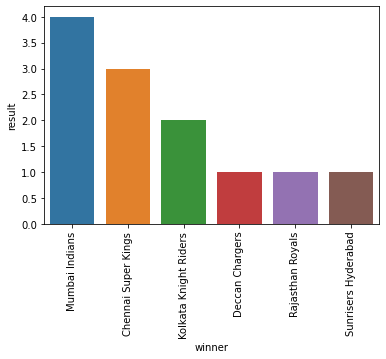

In [18]:
sns.barplot(count.winner,count.result)
plt.xticks(rotation=90)

#### If we see above plot we can conclude that most no. of seasons are won by Mumbai Indians and Chennai Super Kings respectively.

In [19]:
ipl08=ipl08.groupby("winner")["win_by_runs","win_by_wickets"].count().sort_values(by=["win_by_runs","win_by_wickets"],ascending=False).reset_index()
ipl09=ipl09.groupby("winner")["win_by_runs","win_by_wickets"].count().sort_values(by=["win_by_runs","win_by_wickets"],ascending=False).reset_index()
ipl10=ipl10.groupby("winner")["win_by_runs","win_by_wickets"].count().sort_values(by=["win_by_runs","win_by_wickets"],ascending=False).reset_index()
ipl11=ipl11.groupby("winner")["win_by_runs","win_by_wickets"].count().sort_values(by=["win_by_runs","win_by_wickets"],ascending=False).reset_index()
ipl12=ipl12.groupby("winner")["win_by_runs","win_by_wickets"].count().sort_values(by=["win_by_runs","win_by_wickets"],ascending=False).reset_index()
ipl13=ipl13.groupby("winner")["win_by_runs","win_by_wickets"].count().sort_values(by=["win_by_runs","win_by_wickets"],ascending=False).reset_index()
ipl14=ipl14.groupby("winner")["win_by_runs","win_by_wickets"].count().sort_values(by=["win_by_runs","win_by_wickets"],ascending=False).reset_index()
ipl15=ipl15.groupby("winner")["win_by_runs","win_by_wickets"].count().sort_values(by=["win_by_runs","win_by_wickets"],ascending=False).reset_index()
ipl16=ipl16.groupby("winner")["win_by_runs","win_by_wickets"].count().sort_values(by=["win_by_runs","win_by_wickets"],ascending=False).reset_index()
ipl17=ipl17.groupby("winner")["win_by_runs","win_by_wickets"].count().sort_values(by=["win_by_runs","win_by_wickets"],ascending=False).reset_index()
ipl18=ipl18.groupby("winner")["win_by_runs","win_by_wickets"].count().sort_values(by=["win_by_runs","win_by_wickets"],ascending=False).reset_index()
ipl19=ipl19.groupby("winner")["win_by_runs","win_by_wickets"].count().sort_values(by=["win_by_runs","win_by_wickets"],ascending=False).reset_index()

In [20]:
ipl08["Wins"]=ipl08.win_by_runs+ipl08.win_by_wickets
ipl09["Wins"]=ipl08.win_by_runs+ipl08.win_by_wickets
ipl10["Wins"]=ipl08.win_by_runs+ipl08.win_by_wickets
ipl11["Wins"]=ipl08.win_by_runs+ipl08.win_by_wickets
ipl12["Wins"]=ipl08.win_by_runs+ipl08.win_by_wickets
ipl13["Wins"]=ipl08.win_by_runs+ipl08.win_by_wickets
ipl14["Wins"]=ipl08.win_by_runs+ipl08.win_by_wickets
ipl15["Wins"]=ipl08.win_by_runs+ipl08.win_by_wickets
ipl16["Wins"]=ipl08.win_by_runs+ipl08.win_by_wickets
ipl17["Wins"]=ipl08.win_by_runs+ipl08.win_by_wickets
ipl18["Wins"]=ipl08.win_by_runs+ipl08.win_by_wickets
ipl19["Wins"]=ipl08.win_by_runs+ipl08.win_by_wickets

ipl08.drop(["win_by_runs","win_by_wickets"],axis=1,inplace=True)
ipl09.drop(["win_by_runs","win_by_wickets"],axis=1,inplace=True)
ipl10.drop(["win_by_runs","win_by_wickets"],axis=1,inplace=True)
ipl11.drop(["win_by_runs","win_by_wickets"],axis=1,inplace=True)
ipl12.drop(["win_by_runs","win_by_wickets"],axis=1,inplace=True)
ipl13.drop(["win_by_runs","win_by_wickets"],axis=1,inplace=True)
ipl14.drop(["win_by_runs","win_by_wickets"],axis=1,inplace=True)
ipl15.drop(["win_by_runs","win_by_wickets"],axis=1,inplace=True)
ipl16.drop(["win_by_runs","win_by_wickets"],axis=1,inplace=True)
ipl17.drop(["win_by_runs","win_by_wickets"],axis=1,inplace=True)
ipl18.drop(["win_by_runs","win_by_wickets"],axis=1,inplace=True)
ipl19.drop(["win_by_runs","win_by_wickets"],axis=1,inplace=True)

In [21]:
ipl08

,winner,Wins
0,Rajasthan Royals,26
1,Kings XI Punjab,20
2,Chennai Super Kings,18
3,Delhi Daredevils,14
4,Mumbai Indians,14
5,Kolkata Knight Riders,12
6,Royal Challengers Bangalore,8
7,Deccan Chargers,4


In [22]:
ipl09

,winner,Wins
0,Delhi Daredevils,26
1,Deccan Chargers,20
2,Royal Challengers Bangalore,18
3,Chennai Super Kings,14
4,Kings XI Punjab,14
5,Rajasthan Royals,12
6,Mumbai Indians,8
7,Kolkata Knight Riders,4


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Rajasthan Royals'),
  Text(1, 0, 'Kings XI Punjab'),
  Text(2, 0, 'Chennai Super Kings'),
  Text(3, 0, 'Delhi Daredevils'),
  Text(4, 0, 'Mumbai Indians'),
  Text(5, 0, 'Kolkata Knight Riders'),
  Text(6, 0, 'Royal Challengers Bangalore'),
  Text(7, 0, 'Deccan Chargers')])

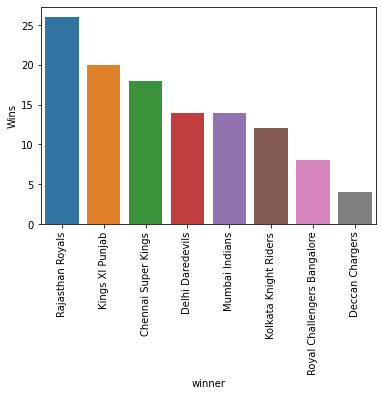

In [23]:
sns.barplot("winner","Wins",data=ipl08)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Delhi Daredevils'),
  Text(1, 0, 'Deccan Chargers'),
  Text(2, 0, 'Royal Challengers Bangalore'),
  Text(3, 0, 'Chennai Super Kings'),
  Text(4, 0, 'Kings XI Punjab'),
  Text(5, 0, 'Rajasthan Royals'),
  Text(6, 0, 'Mumbai Indians'),
  Text(7, 0, 'Kolkata Knight Riders')])

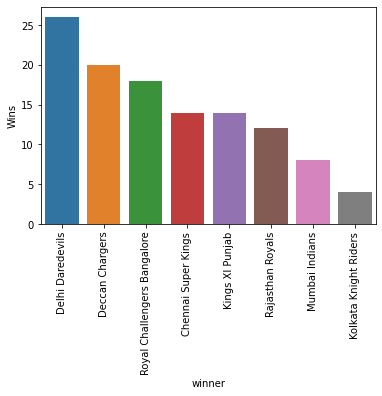

In [24]:
sns.barplot("winner","Wins",data=ipl09)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Mumbai Indians'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Deccan Chargers'),
  Text(3, 0, 'Royal Challengers Bangalore'),
  Text(4, 0, 'Delhi Daredevils'),
  Text(5, 0, 'Kolkata Knight Riders'),
  Text(6, 0, 'Rajasthan Royals'),
  Text(7, 0, 'Kings XI Punjab')])

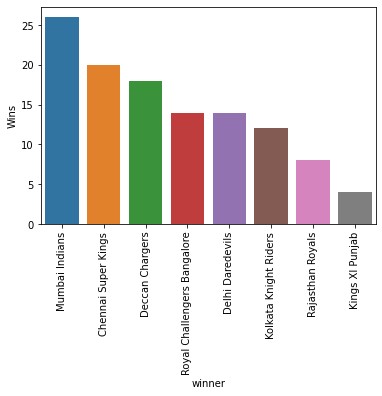

In [25]:
sns.barplot("winner","Wins",data=ipl10)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Chennai Super Kings'),
  Text(1, 0, 'Mumbai Indians'),
  Text(2, 0, 'Royal Challengers Bangalore'),
  Text(3, 0, 'Kolkata Knight Riders'),
  Text(4, 0, 'Kings XI Punjab'),
  Text(5, 0, 'Deccan Chargers'),
  Text(6, 0, 'Kochi Tuskers Kerala'),
  Text(7, 0, 'Rajasthan Royals'),
  Text(8, 0, 'Delhi Daredevils'),
  Text(9, 0, 'Pune Warriors')])

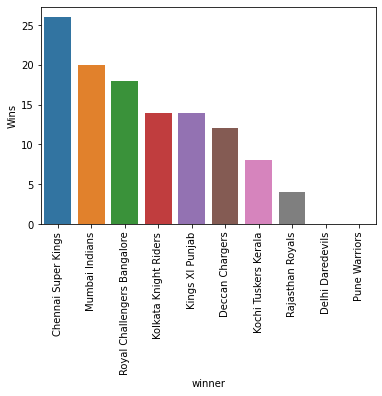

In [26]:
sns.barplot("winner","Wins",data=ipl11)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Kolkata Knight Riders'),
  Text(1, 0, 'Delhi Daredevils'),
  Text(2, 0, 'Chennai Super Kings'),
  Text(3, 0, 'Mumbai Indians'),
  Text(4, 0, 'Kings XI Punjab'),
  Text(5, 0, 'Royal Challengers Bangalore'),
  Text(6, 0, 'Rajasthan Royals'),
  Text(7, 0, 'Deccan Chargers'),
  Text(8, 0, 'Pune Warriors')])

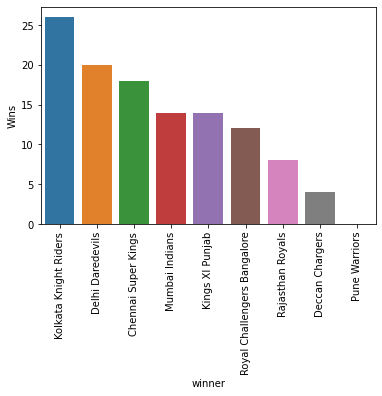

In [27]:
sns.barplot("winner","Wins",data=ipl12)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Mumbai Indians'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Rajasthan Royals'),
  Text(3, 0, 'Sunrisers Hyderabad'),
  Text(4, 0, 'Royal Challengers Bangalore'),
  Text(5, 0, 'Kings XI Punjab'),
  Text(6, 0, 'Kolkata Knight Riders'),
  Text(7, 0, 'Pune Warriors'),
  Text(8, 0, 'Delhi Daredevils')])

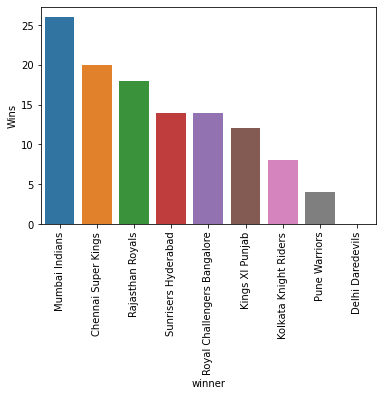

In [28]:
sns.barplot("winner","Wins",data=ipl13)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Kings XI Punjab'),
  Text(1, 0, 'Kolkata Knight Riders'),
  Text(2, 0, 'Chennai Super Kings'),
  Text(3, 0, 'Mumbai Indians'),
  Text(4, 0, 'Rajasthan Royals'),
  Text(5, 0, 'Sunrisers Hyderabad'),
  Text(6, 0, 'Royal Challengers Bangalore'),
  Text(7, 0, 'Delhi Daredevils')])

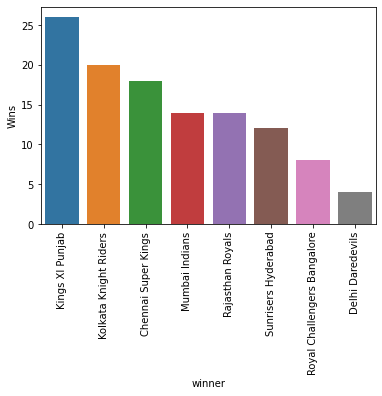

In [29]:
sns.barplot("winner","Wins",data=ipl14)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Chennai Super Kings'),
  Text(1, 0, 'Mumbai Indians'),
  Text(2, 0, 'Royal Challengers Bangalore'),
  Text(3, 0, 'Kolkata Knight Riders'),
  Text(4, 0, 'Rajasthan Royals'),
  Text(5, 0, 'Sunrisers Hyderabad'),
  Text(6, 0, 'Delhi Daredevils'),
  Text(7, 0, 'Kings XI Punjab')])

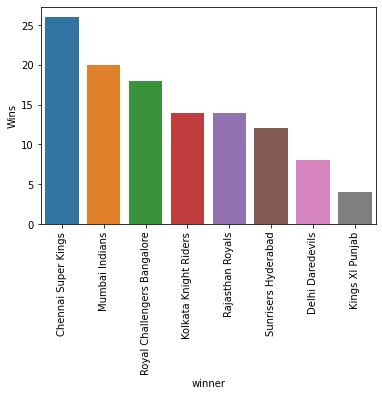

In [30]:
sns.barplot("winner","Wins",data=ipl15)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Sunrisers Hyderabad'),
  Text(1, 0, 'Gujarat Lions'),
  Text(2, 0, 'Royal Challengers Bangalore'),
  Text(3, 0, 'Kolkata Knight Riders'),
  Text(4, 0, 'Delhi Daredevils'),
  Text(5, 0, 'Mumbai Indians'),
  Text(6, 0, 'Rising Pune Supergiants'),
  Text(7, 0, 'Kings XI Punjab')])

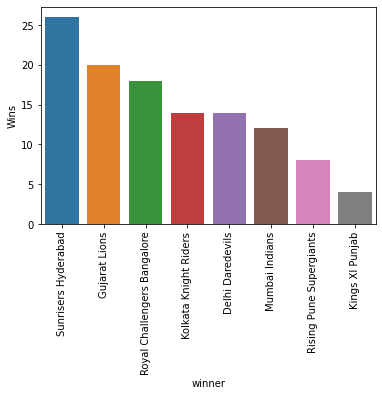

In [31]:
sns.barplot("winner","Wins",data=ipl16)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Mumbai Indians'),
  Text(1, 0, 'Rising Pune Supergiant'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Sunrisers Hyderabad'),
  Text(4, 0, 'Kings XI Punjab'),
  Text(5, 0, 'Delhi Daredevils'),
  Text(6, 0, 'Gujarat Lions'),
  Text(7, 0, 'Royal Challengers Bangalore')])

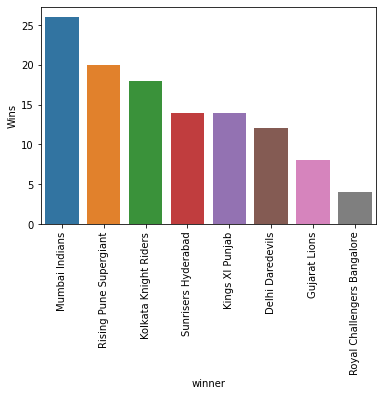

In [32]:
sns.barplot("winner","Wins",data=ipl17)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Chennai Super Kings'),
  Text(1, 0, 'Sunrisers Hyderabad'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Rajasthan Royals'),
  Text(4, 0, 'Kings XI Punjab'),
  Text(5, 0, 'Mumbai Indians'),
  Text(6, 0, 'Royal Challengers Bangalore'),
  Text(7, 0, 'Delhi Daredevils')])

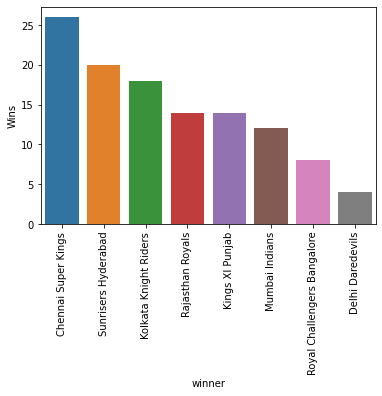

In [33]:
sns.barplot("winner","Wins",data=ipl18)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Mumbai Indians'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Delhi Capitals'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Kolkata Knight Riders'),
  Text(5, 0, 'Sunrisers Hyderabad'),
  Text(6, 0, 'Rajasthan Royals'),
  Text(7, 0, 'Royal Challengers Bangalore')])

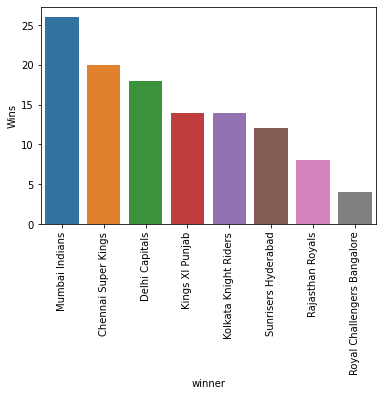

In [34]:
sns.barplot("winner","Wins",data=ipl19)
plt.xticks(rotation=90)

#### After seeing the visualizations of respective seasons we can conclude that most consistent teams are:
#### 1. Chennai Super Kings 
#### 2. Mumbai Indians
#### These 2 teams went most no. times in the playoffs than any other teams.

posx and posy should be finite values
posx and posy should be finite values


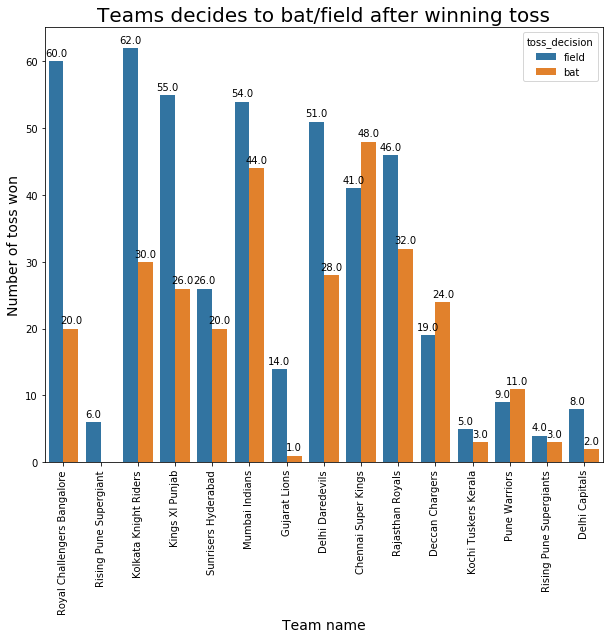

In [35]:
plt.figure(figsize=(10,8))
ax = sns.countplot(match_data['toss_winner'], hue=match_data['toss_decision'])
plt.title('Teams decides to bat/field after winning toss', fontsize=20)
plt.xlabel('Team name', fontsize=14)
plt.ylabel('Number of toss won', fontsize=14)
plt.xticks(rotation=90)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height() + 0.75,rect.get_height(),horizontalalignment='center')

As we see,
* **KKR** chose to field in 62 toss won cases.
* It is observed that **CSK** chose to bat more than field after winning toss.
* **SRH** has nearly equal decision of bat or field after toss won. 

In [36]:
home_away_data.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222


### Seeing if there is any null values are present there not. If yes then taking nescessary steps.

In [37]:
home_away_data[home_away_data.isnull().any(axis=1)]

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage


In [38]:
match_data.isnull().sum()

id                0
Season            0
date              0
team1             0
team2             0
toss_winner       0
toss_decision     0
result            0
winner            0
win_by_runs       0
win_by_wickets    0
dtype: int64

#### Seeing the visualizations of which team won most no. of the games in home and away games respectively.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

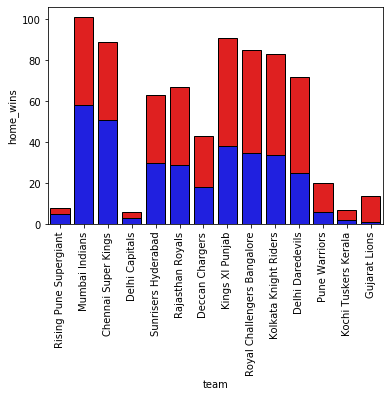

In [39]:
sns.barplot(home_away_data.team,home_away_data.home_matches, color = 'r',edgecolor = 'black')
sns.barplot(home_away_data.team,home_away_data.home_wins, color = 'b',edgecolor = 'black')
plt.xticks(rotation=90)

As we see,
* **MI** has played **101** matches at home ground and won **58** match from them.
* **GL** has played **14** matches at home ground and won only **1** match from them.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

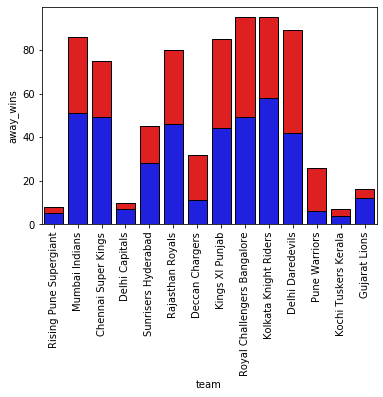

In [40]:
sns.barplot(home_away_data.team,home_away_data.away_matches, color = 'r',edgecolor = 'black')
sns.barplot(home_away_data.team,home_away_data.away_wins, color = 'b',edgecolor = 'black')
plt.xticks(rotation=90)

As we see,
* **RCB** and **KKR** played **95** matches at other ground among them they won **49** and **58** matches respectively.
* **GL** played **16** matches at other ground and won **12** match from them.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

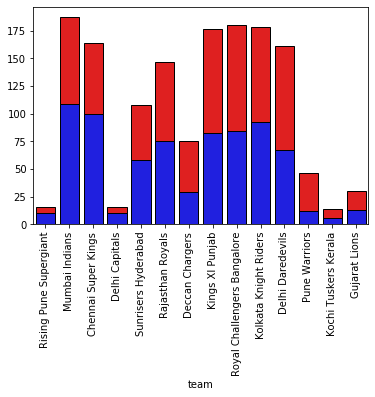

In [41]:
sns.barplot(home_away_data.team,(home_away_data.away_matches+home_away_data.home_matches), color = 'r',edgecolor = 'black')
sns.barplot(home_away_data.team,(home_away_data.away_wins+home_away_data.home_wins), color = 'b',edgecolor = 'black')
plt.xticks(rotation=90)

In [42]:
deliveries_data.head().T

,0,1,2,3,4
match_id,1,1,1,1,1
inning,1,1,1,1,1
batting_team,Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad
bowling_team,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore,Royal Challengers Bangalore
over,1,1,1,1,1
ball,1,2,3,4,5
batsman,DA Warner,DA Warner,DA Warner,DA Warner,DA Warner
non_striker,S Dhawan,S Dhawan,S Dhawan,S Dhawan,S Dhawan
bowler,TS Mills,TS Mills,TS Mills,TS Mills,TS Mills
is_super_over,0,0,0,0,0


### Seeing if there is any null values are present there not. If yes then taking nescessary steps.

In [43]:
deliveries_data[deliveries_data.isnull().any(axis=1)]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179072,11415,2,Chennai Super Kings,Mumbai Indians,20,1,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [44]:
len(deliveries_data)

179078

In [45]:
deliveries_data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [46]:
deliveries_data.dismissal_kind.fillna(0,inplace=True)

In [47]:
deliveries_data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind           0
fielder             172630
dtype: int64

In [48]:
deliveries_data.drop(["inning","is_super_over","wide_runs","bye_runs","legbye_runs","noball_runs","penalty_runs","batsman_runs","extra_runs","player_dismissed","fielder"],axis=1,inplace=True)

In [49]:
deliveries_data.isnull().sum()

match_id          0
batting_team      0
bowling_team      0
over              0
ball              0
batsman           0
non_striker       0
bowler            0
total_runs        0
dismissal_kind    0
dtype: int64

In [50]:
deliveries_data.dismissal_kind.value_counts()

0                        170244
caught                     5348
bowled                     1581
run out                     852
lbw                         540
stumped                     278
caught and bowled           211
retired hurt                 12
hit wicket                   10
obstructing the field         2
Name: dismissal_kind, dtype: int64

In [51]:
deliveries_data[deliveries_data.dismissal_kind!=0]=deliveries_data[deliveries_data.dismissal_kind!=0].assign(dismissal_kind=1)

In [52]:
deliveries_data.dismissal_kind.value_counts()

0    170244
1      8834
Name: dismissal_kind, dtype: int64

In [53]:
len(deliveries_data)

179078

In [54]:
deliveries_data.iloc[:,[7,9]]

,bowler,dismissal_kind
0,TS Mills,0
1,TS Mills,0
2,TS Mills,0
3,TS Mills,0
4,TS Mills,0
...,...,...
179073,SL Malinga,0
179074,SL Malinga,0
179075,SL Malinga,1
179076,SL Malinga,0


In [55]:
deliveries_data.iloc[:,7].value_counts()

Harbhajan Singh    3451
A Mishra           3172
PP Chawla          3157
R Ashwin           3016
SL Malinga         2974
                   ... 
KS Williamson         6
RA Shaikh             6
SN Khan               2
SPD Smith             2
AC Gilchrist          1
Name: bowler, Length: 405, dtype: int64

In [56]:
deliveries_data.head()

,match_id,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,total_runs,dismissal_kind
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0
2,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,4,0
3,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0
4,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,2,0


In [57]:
deliveries_data.rename(columns = {'match_id':'id'}, inplace = True)

#### Merging 2 datasets for more insights

In [58]:
result = pd.merge(match_data, deliveries_data, on="id")

In [59]:
result

,id,Season,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,total_runs,dismissal_kind
0,1,IPL-2017,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0
1,1,IPL-2017,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0
2,1,IPL-2017,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,4,0
3,1,IPL-2017,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0
4,1,IPL-2017,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178701,11415,IPL-2019,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Mumbai Indians,1,0,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,1,0
178702,11415,IPL-2019,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Mumbai Indians,1,0,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,2,0
178703,11415,IPL-2019,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Mumbai Indians,1,0,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,1,1
178704,11415,IPL-2019,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Mumbai Indians,1,0,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,2,0


In [60]:
ipl08=result[result.iloc[:,1]=="IPL-2008"]
ipl09=result[result.iloc[:,1]=="IPL-2009"]
ipl10=result[result.iloc[:,1]=="IPL-2010"]
ipl11=result[result.iloc[:,1]=="IPL-2011"]
ipl12=result[result.iloc[:,1]=="IPL-2012"]
ipl13=result[result.iloc[:,1]=="IPL-2013"]
ipl14=result[result.iloc[:,1]=="IPL-2014"]
ipl15=result[result.iloc[:,1]=="IPL-2015"]
ipl16=result[result.iloc[:,1]=="IPL-2016"]
ipl17=result[result.iloc[:,1]=="IPL-2017"]
ipl18=result[result.iloc[:,1]=="IPL-2018"]
ipl19=result[result.iloc[:,1]=="IPL-2019"]

In [61]:
orangecap08=ipl08.groupby("batsman")["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False,ignore_index=True)
orangecap09=ipl09.groupby("batsman")["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False,ignore_index=True)
orangecap10=ipl10.groupby("batsman")["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False,ignore_index=True)
orangecap11=ipl11.groupby("batsman")["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False,ignore_index=True)
orangecap12=ipl12.groupby("batsman")["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False,ignore_index=True)
orangecap13=ipl13.groupby("batsman")["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False,ignore_index=True)
orangecap14=ipl14.groupby("batsman")["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False,ignore_index=True)
orangecap15=ipl15.groupby("batsman")["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False,ignore_index=True)
orangecap16=ipl16.groupby("batsman")["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False,ignore_index=True)
orangecap17=ipl17.groupby("batsman")["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False,ignore_index=True)
orangecap18=ipl18.groupby("batsman")["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False,ignore_index=True)
orangecap19=ipl19.groupby("batsman")["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False,ignore_index=True)

In [62]:
orangecap08

,batsman,total_runs
0,SE Marsh,644
1,G Gambhir,566
2,ST Jayasuriya,557
3,SR Watson,496
4,GC Smith,485
...,...,...
149,Abdur Razzak,0
150,M Muralitharan,0
151,MM Patel,0
152,U Kaul,0


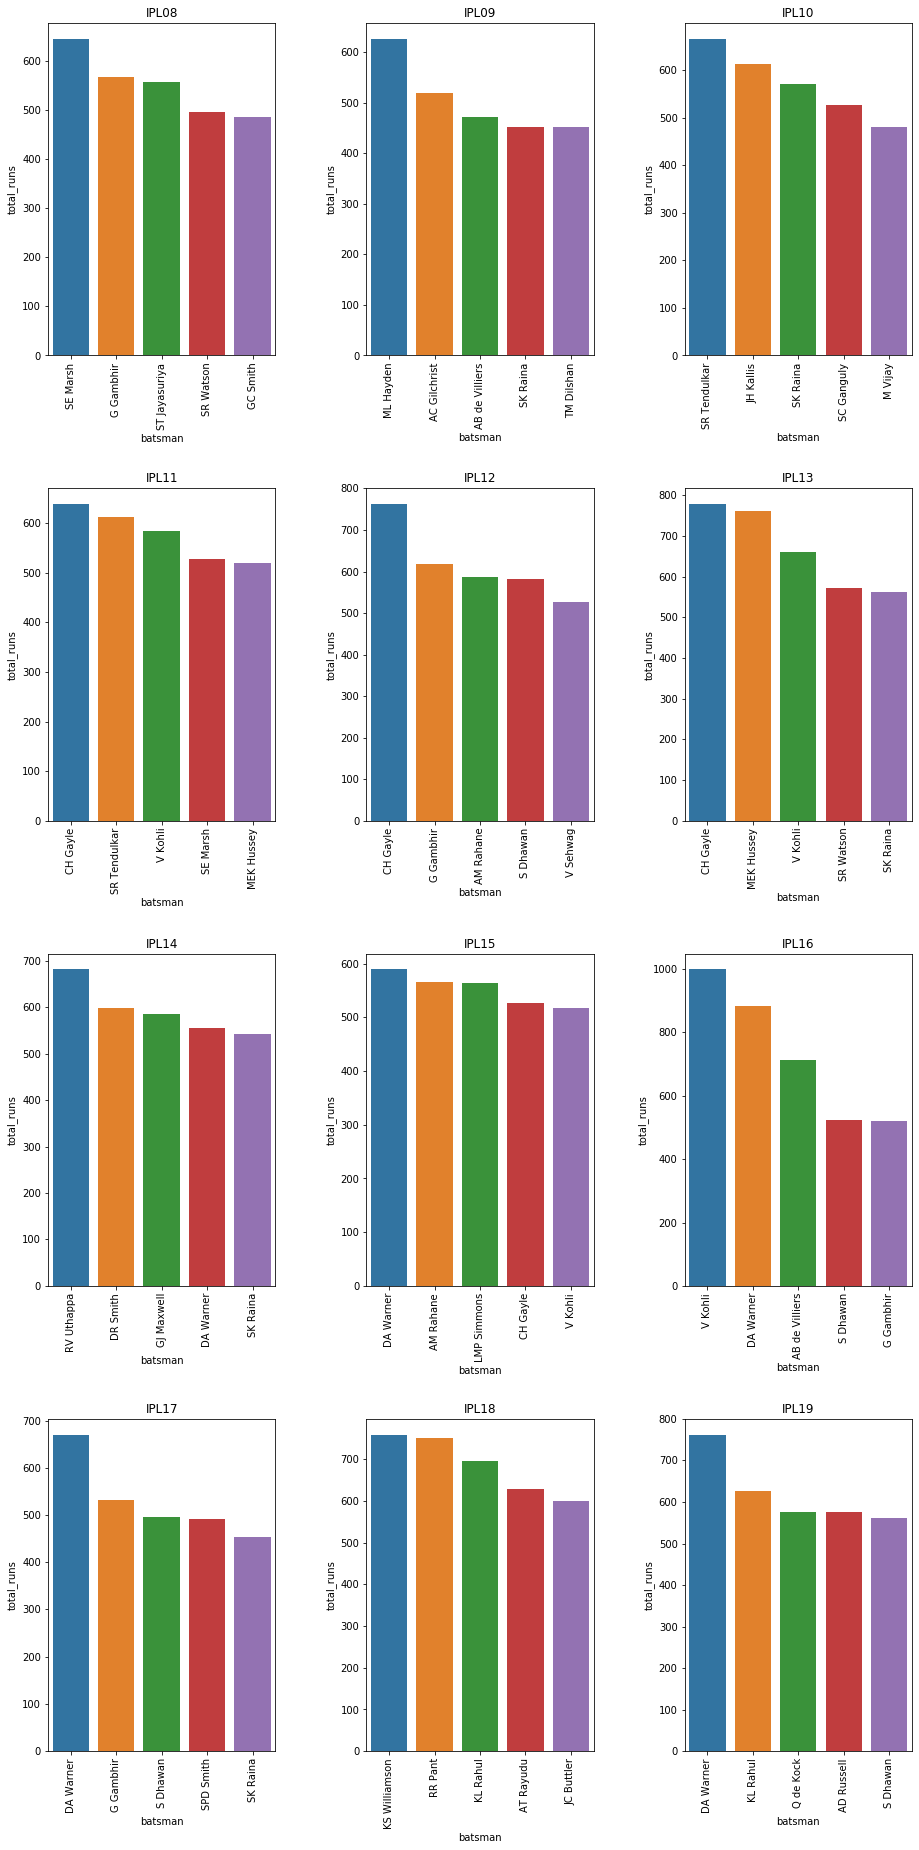

In [63]:
plt.subplot(4, 3, 1)
sns.barplot(orangecap08.batsman.head(),orangecap08.total_runs.head())
plt.title("IPL08")
plt.xticks(rotation=90)
plt.subplot(4, 3, 2)
sns.barplot(orangecap09.batsman.head(),orangecap09.total_runs.head())
plt.title("IPL09")
plt.xticks(rotation=90)
plt.subplot(4, 3, 3)
sns.barplot(orangecap10.batsman.head(),orangecap10.total_runs.head())
plt.title("IPL10")
plt.xticks(rotation=90)
plt.subplot(4, 3, 4)
sns.barplot(orangecap11.batsman.head(),orangecap11.total_runs.head())
plt.title("IPL11")
plt.xticks(rotation=90)
plt.subplot(4, 3, 5)
sns.barplot(orangecap12.batsman.head(),orangecap12.total_runs.head())
plt.title("IPL12")
plt.xticks(rotation=90)
plt.subplot(4, 3, 6)
sns.barplot(orangecap13.batsman.head(),orangecap13.total_runs.head())
plt.title("IPL13")
plt.xticks(rotation=90)
plt.subplot(4, 3, 7)
sns.barplot(orangecap14.batsman.head(),orangecap14.total_runs.head())
plt.title("IPL14")
plt.xticks(rotation=90)
plt.subplot(4, 3, 8)
sns.barplot(orangecap15.batsman.head(),orangecap15.total_runs.head())
plt.title("IPL15")
plt.xticks(rotation=90)
plt.subplot(4, 3, 9)
sns.barplot(orangecap16.batsman.head(),orangecap16.total_runs.head())
plt.title("IPL16")
plt.xticks(rotation=90)
plt.subplot(4, 3, 10)
sns.barplot(orangecap17.batsman.head(),orangecap17.total_runs.head())
plt.title("IPL17")
plt.xticks(rotation=90)
plt.subplot(4, 3, 11)
sns.barplot(orangecap18.batsman.head(),orangecap18.total_runs.head())
plt.title("IPL18")
plt.xticks(rotation=90)
plt.subplot(4, 3, 12)
sns.barplot(orangecap19.batsman.head(),orangecap19.total_runs.head())
plt.title("IPL19")
plt.xticks(rotation=90)
plt.subplots_adjust(left=1,bottom=1,right=3,top=7, wspace=0.4,hspace=0.4)

#### Above plots are of orange cap winners of every season.

In [64]:
orangecap=orangecap08.head(1)
orangecap=orangecap.append([orangecap09.head(1),orangecap10.head(1),orangecap11.head(1),orangecap12.head(1),orangecap13.head(1),orangecap14.head(1),orangecap15.head(1),orangecap16.head(1),orangecap17.head(1),orangecap18.head(1),orangecap19.head(1)])

In [65]:
count=orangecap.groupby("batsman")["total_runs"].count().reset_index()

In [66]:
count.sort_values(by="total_runs",ascending=False,ignore_index=True,inplace=True)
count

,batsman,total_runs
0,CH Gayle,3
1,DA Warner,3
2,KS Williamson,1
3,ML Hayden,1
4,RV Uthappa,1
5,SE Marsh,1
6,SR Tendulkar,1
7,V Kohli,1


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

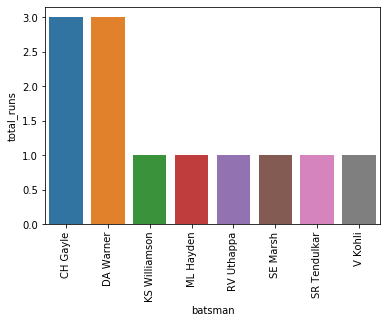

In [67]:
sns.barplot(count.batsman,count.total_runs)
plt.xticks(rotation=90)

#### This means most no. of times orange cap was won by:
#### 1. Chris Gayle
##### 2. David Warner

In [68]:
purplecap08=ipl08.groupby("bowler")["dismissal_kind"].sum().reset_index().sort_values(by="dismissal_kind",ascending=False,ignore_index=True)
purplecap09=ipl09.groupby("bowler")["dismissal_kind"].sum().reset_index().sort_values(by="dismissal_kind",ascending=False,ignore_index=True)
purplecap10=ipl10.groupby("bowler")["dismissal_kind"].sum().reset_index().sort_values(by="dismissal_kind",ascending=False,ignore_index=True)
purplecap11=ipl11.groupby("bowler")["dismissal_kind"].sum().reset_index().sort_values(by="dismissal_kind",ascending=False,ignore_index=True)
purplecap12=ipl12.groupby("bowler")["dismissal_kind"].sum().reset_index().sort_values(by="dismissal_kind",ascending=False,ignore_index=True)
purplecap13=ipl13.groupby("bowler")["dismissal_kind"].sum().reset_index().sort_values(by="dismissal_kind",ascending=False,ignore_index=True)
purplecap14=ipl14.groupby("bowler")["dismissal_kind"].sum().reset_index().sort_values(by="dismissal_kind",ascending=False,ignore_index=True)
purplecap15=ipl15.groupby("bowler")["dismissal_kind"].sum().reset_index().sort_values(by="dismissal_kind",ascending=False,ignore_index=True)
purplecap16=ipl16.groupby("bowler")["dismissal_kind"].sum().reset_index().sort_values(by="dismissal_kind",ascending=False,ignore_index=True)
purplecap17=ipl17.groupby("bowler")["dismissal_kind"].sum().reset_index().sort_values(by="dismissal_kind",ascending=False,ignore_index=True)
purplecap18=ipl18.groupby("bowler")["dismissal_kind"].sum().reset_index().sort_values(by="dismissal_kind",ascending=False,ignore_index=True)
purplecap19=ipl19.groupby("bowler")["dismissal_kind"].sum().reset_index().sort_values(by="dismissal_kind",ascending=False,ignore_index=True)

In [69]:
purplecap08=purplecap08[purplecap08.dismissal_kind>0]
purplecap09=purplecap09[purplecap09.dismissal_kind>0]
purplecap10=purplecap10[purplecap10.dismissal_kind>0]
purplecap11=purplecap11[purplecap11.dismissal_kind>0]
purplecap12=purplecap12[purplecap12.dismissal_kind>0]
purplecap13=purplecap13[purplecap13.dismissal_kind>0]
purplecap14=purplecap14[purplecap14.dismissal_kind>0]
purplecap15=purplecap15[purplecap15.dismissal_kind>0]
purplecap16=purplecap16[purplecap16.dismissal_kind>0]
purplecap17=purplecap17[purplecap17.dismissal_kind>0]
purplecap18=purplecap18[purplecap18.dismissal_kind>0]
purplecap19=purplecap19[purplecap19.dismissal_kind>0]

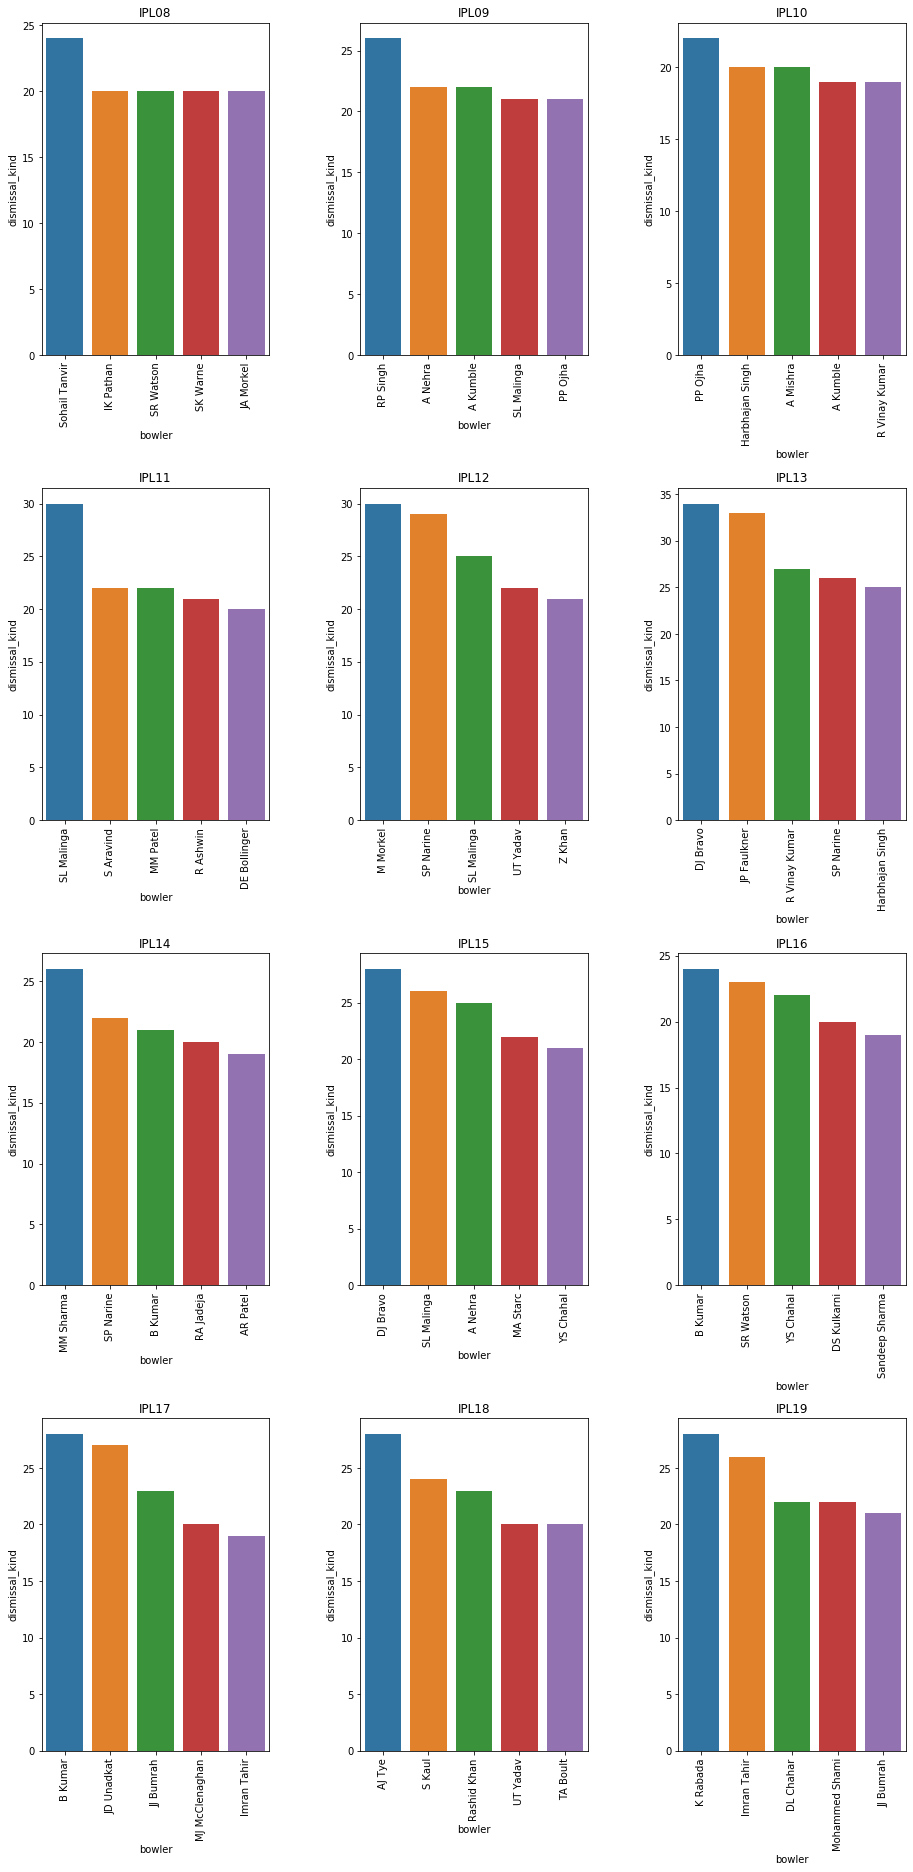

In [70]:
plt.subplot(4, 3, 1)
sns.barplot(purplecap08.bowler.head(),purplecap08.dismissal_kind.head())
plt.title("IPL08")
plt.xticks(rotation=90)
plt.subplot(4, 3, 2)
sns.barplot(purplecap09.bowler.head(),purplecap09.dismissal_kind.head())
plt.title("IPL09")
plt.xticks(rotation=90)
plt.subplot(4, 3, 3)
sns.barplot(purplecap10.bowler.head(),purplecap10.dismissal_kind.head())
plt.title("IPL10")
plt.xticks(rotation=90)
plt.subplot(4, 3, 4)
sns.barplot(purplecap11.bowler.head(),purplecap11.dismissal_kind.head())
plt.title("IPL11")
plt.xticks(rotation=90)
plt.subplot(4, 3, 5)
sns.barplot(purplecap12.bowler.head(),purplecap12.dismissal_kind.head())
plt.title("IPL12")
plt.xticks(rotation=90)
plt.subplot(4, 3, 6)
sns.barplot(purplecap13.bowler.head(),purplecap13.dismissal_kind.head())
plt.title("IPL13")
plt.xticks(rotation=90)
plt.subplot(4, 3, 7)
sns.barplot(purplecap14.bowler.head(),purplecap14.dismissal_kind.head())
plt.title("IPL14")
plt.xticks(rotation=90)
plt.subplot(4, 3, 8)
sns.barplot(purplecap15.bowler.head(),purplecap15.dismissal_kind.head())
plt.title("IPL15")
plt.xticks(rotation=90)
plt.subplot(4, 3, 9)
sns.barplot(purplecap16.bowler.head(),purplecap16.dismissal_kind.head())
plt.title("IPL16")
plt.xticks(rotation=90)
plt.subplot(4, 3, 10)
sns.barplot(purplecap17.bowler.head(),purplecap17.dismissal_kind.head())
plt.title("IPL17")
plt.xticks(rotation=90)
plt.subplot(4, 3, 11)
sns.barplot(purplecap18.bowler.head(),purplecap18.dismissal_kind.head())
plt.title("IPL18")
plt.xticks(rotation=90)
plt.subplot(4, 3, 12)
sns.barplot(purplecap19.bowler.head(),purplecap19.dismissal_kind.head())
plt.title("IPL19")
plt.xticks(rotation=90)
plt.subplots_adjust(left=1,bottom=1,right=3,top=7, wspace=0.4,hspace=0.4)

In [71]:
purplecap=purplecap08.head(1)
purplecap=purplecap.append([purplecap09.head(1),purplecap10.head(1),purplecap11.head(1),purplecap12.head(1),purplecap13.head(1),purplecap14.head(1),purplecap15.head(1),purplecap16.head(1),purplecap17.head(1),purplecap18.head(1),purplecap19.head(1)])

In [72]:
count=purplecap.groupby("bowler")["dismissal_kind"].count().reset_index()

In [73]:
count.sort_values(by="dismissal_kind",ascending=False,ignore_index=True,inplace=True)
count

,bowler,dismissal_kind
0,B Kumar,2
1,DJ Bravo,2
2,AJ Tye,1
3,K Rabada,1
4,M Morkel,1
5,MM Sharma,1
6,PP Ojha,1
7,RP Singh,1
8,SL Malinga,1
9,Sohail Tanvir,1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

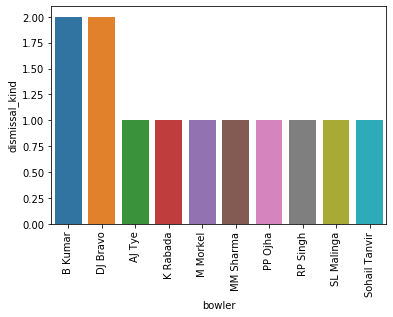

In [74]:
sns.barplot(count.bowler,count.dismissal_kind)
plt.xticks(rotation=90)

#### This means most no. of times orange cap was won by:
#### 1. Bhuvneshwar Kumar
##### 2. Dwayne Bravo

In [75]:
deliveries_data[deliveries_data['total_runs'] == 6]

,id,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,total_runs,dismissal_kind
10,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,4,DA Warner,S Dhawan,A Choudhary,6,0
47,1,Sunrisers Hyderabad,Royal Challengers Bangalore,8,4,MC Henriques,S Dhawan,TM Head,6,0
75,1,Sunrisers Hyderabad,Royal Challengers Bangalore,13,2,Yuvraj Singh,MC Henriques,A Choudhary,6,0
89,1,Sunrisers Hyderabad,Royal Challengers Bangalore,15,3,Yuvraj Singh,MC Henriques,S Aravind,6,0
91,1,Sunrisers Hyderabad,Royal Challengers Bangalore,15,5,MC Henriques,Yuvraj Singh,S Aravind,6,0
...,...,...,...,...,...,...,...,...,...,...
178987,11415,Chennai Super Kings,Mumbai Indians,6,4,SR Watson,SK Raina,SL Malinga,6,0
179048,11415,Chennai Super Kings,Mumbai Indians,16,1,DJ Bravo,SR Watson,SL Malinga,6,0
179061,11415,Chennai Super Kings,Mumbai Indians,18,2,SR Watson,DJ Bravo,KH Pandya,6,0
179062,11415,Chennai Super Kings,Mumbai Indians,18,3,SR Watson,DJ Bravo,KH Pandya,6,0


# Teams who scored most numer of sixes

Text(0, 0.5, 'Team name')

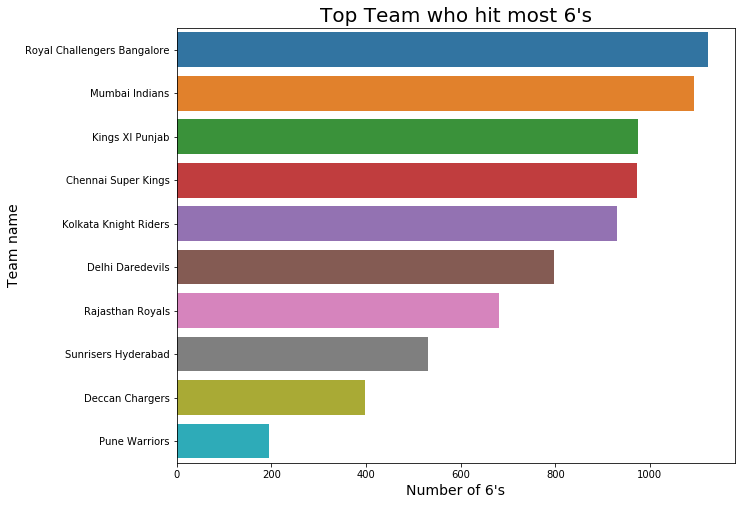

In [78]:
sixt_df = deliveries_data[deliveries_data['total_runs'] == 6]

# plotting batsman with batsman_runs
plt.figure(figsize=(10,8))
x = sixt_df.groupby('batting_team').count()['total_runs'].sort_values(ascending=False)[:10]
sns.barplot(x.values, x.index)
plt.title('Top Team who hit most 6\'s', fontsize=20)
plt.xlabel('Number of 6\'s', fontsize=14)
plt.ylabel('Team name', fontsize=14)


As we see,
* **Royal Challengers Bangalore** is at the top of list with a score of 1123.
* **Mumbai Indians** is at the second position with a score of 1094.

# Batsmen who scored most number of sixes

Text(0, 0.5, 'Batsmen name')

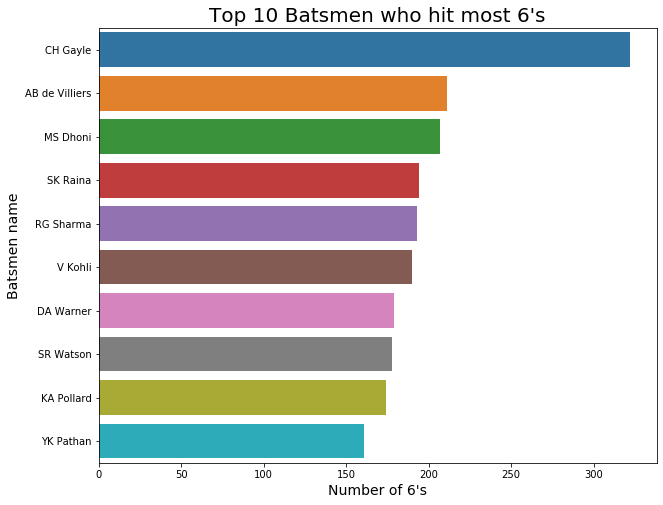

In [76]:
six_df = deliveries_data[deliveries_data['total_runs'] == 6]

# plotting batsman with batsman_runs
plt.figure(figsize=(10,8))
x = six_df.groupby('batsman').count()['total_runs'].sort_values(ascending=False)[:10]
sns.barplot(x.values, x.index)
plt.title('Top 10 Batsmen who hit most 6\'s', fontsize=20)
plt.xlabel('Number of 6\'s', fontsize=14)
plt.ylabel('Batsmen name', fontsize=14)


As we see,
* **Chris Gayle** has the highest number of 6's with a score of 327.
* **AB de Villers** is on the second position with a score of214.

# Teams who scored most number of fours

Text(0, 0.5, 'Team name')

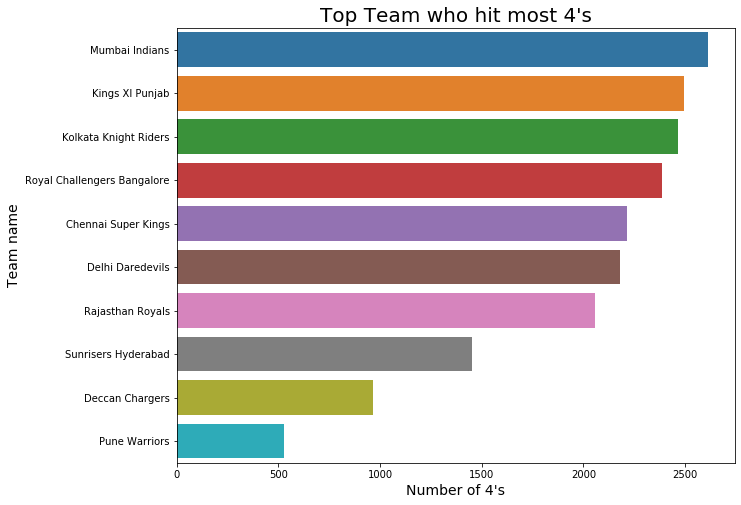

In [79]:
fourt_df = deliveries_data[deliveries_data['total_runs'] == 4]

# plotting batsman with batsman_runs
plt.figure(figsize=(10,8))
x = fourt_df.groupby('batting_team').count()['total_runs'].sort_values(ascending=False)[:10]
sns.barplot(x.values, x.index)
plt.title('Top Team who hit most 4\'s', fontsize=20)
plt.xlabel('Number of 4\'s', fontsize=14)
plt.ylabel('Team name', fontsize=14)


As we see,
* **Mumbai Indians** is at the top of list with a score of 2613.
* **Kings XI Punjab** is at the second position with a score of 2492.

# Batsmen who scored most number of fours

Text(0, 0.5, 'Batsmen name')

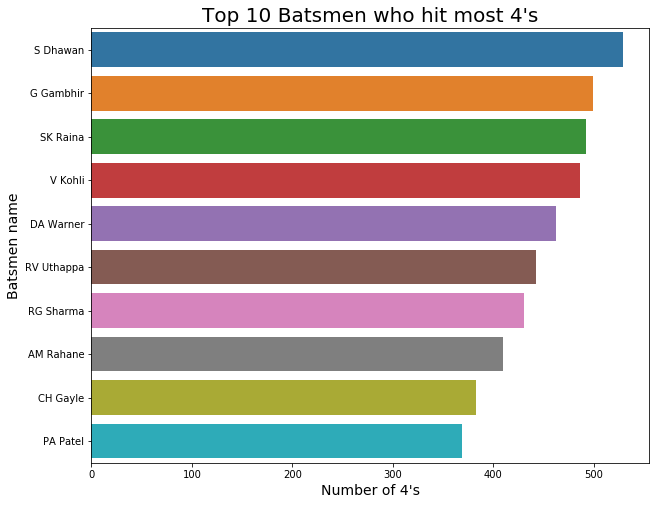

In [77]:
four_df = deliveries_data[deliveries_data['total_runs'] == 4]

# plotting batsman with batsman_runs
plt.figure(figsize=(10,8))
x = four_df.groupby('batsman').count()['total_runs'].sort_values(ascending=False)[:10]
sns.barplot(x.values, x.index)
plt.title('Top 10 Batsmen who hit most 4\'s', fontsize=20)
plt.xlabel('Number of 4\'s', fontsize=14)
plt.ylabel('Batsmen name', fontsize=14)


As we see,
* **Shikhar Dhawan** is at the top of list with a score of 526.
* **Suresh Raina** is at the second position with a score of 495.

In [80]:
deliveries_df1=pd.DataFrame(deliveries_data.iloc[:,[7,9]].groupby(["bowler"])["dismissal_kind"].count())

In [81]:
deliveries_df1.sort_values(by="dismissal_kind",ascending=False,inplace=True)

In [82]:
deliveries_df1.reset_index(inplace=True)

In [83]:
deliveries_df1.head()

,bowler,dismissal_kind
0,Harbhajan Singh,3451
1,A Mishra,3172
2,PP Chawla,3157
3,R Ashwin,3016
4,SL Malinga,2974


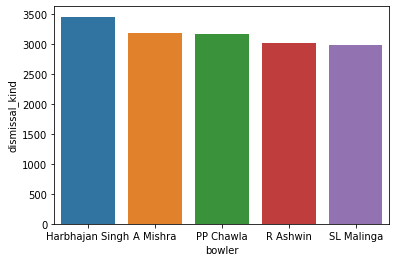

In [84]:
sns.barplot(deliveries_df1.bowler.head(),deliveries_df1.dismissal_kind.head())

As we see, 
* **Harbhajan Singh** is on the top with a score of 3451.
* **A Mishra** is on second position with a score of 3172.

In [85]:
deliveries_df2=deliveries_data.groupby("batting_team")["total_runs","ball"].sum().sort_values(by=["total_runs","ball"],ascending=False).reset_index()

In [86]:
deliveries_df2["strike_rate"]=deliveries_df2.total_runs/deliveries_df2.ball
deliveries_df2.sort_values(by="strike_rate",ascending=False,ignore_index=True,inplace=True)
deliveries_df2.drop(["total_runs","ball"],axis=1,inplace=True)

In [87]:
deliveries_df2

,batting_team,strike_rate
0,Delhi Capitals,0.384166
1,Gujarat Lions,0.377016
2,Royal Challengers Bangalore,0.372431
3,Chennai Super Kings,0.369617
4,Kings XI Punjab,0.368984
5,Sunrisers Hyderabad,0.365594
6,Mumbai Indians,0.363024
7,Kolkata Knight Riders,0.362978
8,Rising Pune Supergiant,0.360847
9,Rising Pune Supergiants,0.359784


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

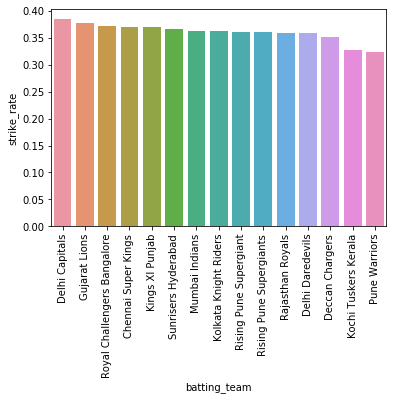

In [88]:
sns.barplot(deliveries_df2.batting_team,deliveries_df2.strike_rate)
plt.xticks(rotation=90)

As we see, 
* **Delhi Capitals** is having highest strike rate among all the teams.
* **Gujarat Lions** is on second position 

Text(0, 0.5, 'Total runs')

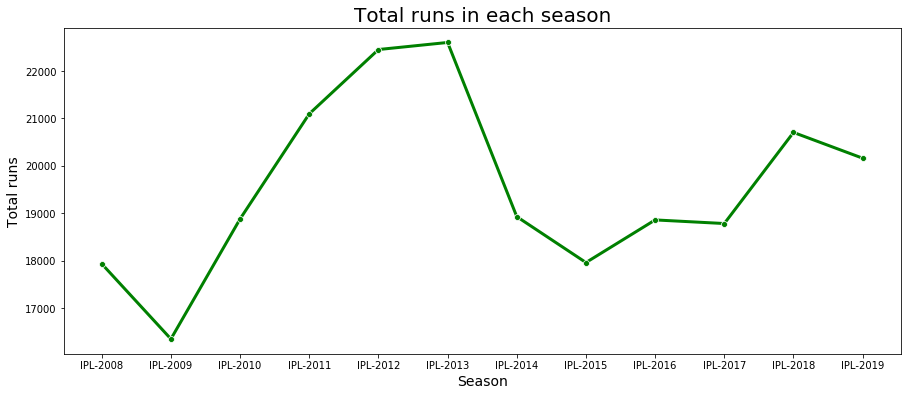

In [89]:
plt.figure(figsize=(15,6))
x =result.groupby('Season')['total_runs'].sum()
sns.lineplot(x.index, x.values, marker='o', color='green', linewidth=3)
plt.title('Total runs in each season', fontsize=20)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total runs', fontsize=14)

* It is observed that the highest runs were scored in **2013** and the lowest runs were in **2009**.

In [90]:
runs_data.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [91]:
runs_data[runs_data.isnull().any(axis=1)]

,batsman,total_runs,out,numberofballs,average,strikerate
359,H Brar,20,0,12,NaN,166.666667
366,P Sahu,19,0,13,NaN,146.153846
386,A Joseph,15,0,13,NaN,115.384615
398,DAJ Bracewell,12,0,9,NaN,133.333333
400,AR Bawne,12,0,12,NaN,100.000000
403,K Upadhyay,12,0,9,NaN,133.333333
418,SM Harwood,9,0,13,NaN,69.230769
433,I Malhotra,7,0,4,NaN,175.000000
436,DM Bravo,6,0,5,NaN,120.000000
437,SS Shaikh,6,0,7,NaN,85.714286


In [92]:
runs_data.isnull().sum()

batsman           0
total_runs        0
out               0
numberofballs     0
average          34
strikerate        0
dtype: int64

In [93]:
runs_data.drop("average",axis=1,inplace=True)

In [94]:
runs_data.isnull().sum()

batsman          0
total_runs       0
out              0
numberofballs    0
strikerate       0
dtype: int64

In [95]:
runs_data=runs_data[runs_data.out>14]

In [96]:
runs_data.sort_values(by="total_runs",ascending=False,inplace=True)

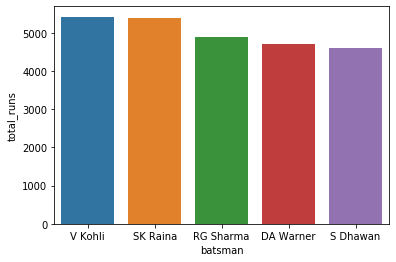

In [97]:
sns.barplot(runs_data.batsman.head(),runs_data.total_runs.head())

As we see, 
* **Virat Kohli** is on the top with a score of 5426.
* **Suresh Raina** is on second position with a score of 5386.

In [98]:
teams_data

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions
5,Chennai Super Kings
6,Rising Pune Supergiants
7,Delhi Daredevils
8,Deccan Chargers
9,Delhi Capitals


In [99]:
players_data.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


### Seeing if there is any null values are present there not. If yes then taking nescessary steps.

In [100]:
players_data[players_data.isnull().any(axis=1)]

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN
6,A Hales,NaT,Right_hand,NaN,NaN
7,A Joseph,NaT,Right_Hand,Right-arm fast,NaN
14,A Roy,NaT,Left_Hand,Slow left-arm orthodox,NaN
...,...,...,...,...,...
535,V Chakravarthy,NaT,Right_Hand,Legbreak,NaN
541,Vishnu Vinod,NaT,Right_hand,NaN,NaN
550,Washington Sundar,NaT,Left_Hand,Right-arm offbreak,NaN
552,WP Saha,1984-10-24,Right_Hand,NaN,India


In [101]:
players_data.isnull().sum()

Player_Name       0
DOB              95
Batting_Hand      3
Bowling_Skill    64
Country          95
dtype: int64

In [102]:
players_data.drop("DOB",axis=1,inplace=True)

In [103]:
players_data.Bowling_Skill.value_counts()

Right-arm medium          107
Right-arm offbreak         91
Right-arm fast-medium      68
Slow left-arm orthodox     50
Right-arm fast             39
Right-arm medium-fast      38
Legbreak                   30
Legbreak googly            28
Left-arm fast-medium       19
Left-arm medium            11
Left-arm medium-fast        9
Slow left-arm chinaman      5
Left-arm fast               4
Right-arm bowler            1
Right-arm Medium            1
Right-arm Fast              1
Name: Bowling_Skill, dtype: int64

In [104]:
players_data.Bowling_Skill.fillna("Left-arm fast",inplace=True)

In [105]:
players_data.dropna(inplace=True)

In [106]:
players_data.isnull().sum()

Player_Name      0
Batting_Hand     0
Bowling_Skill    0
Country          0
dtype: int64

In [107]:
players_df1=players_data.groupby("Batting_Hand")["Player_Name"].count().reset_index()

In [108]:
players_df1

,Batting_Hand,Player_Name
0,Left_Hand,123
1,Right_Hand,348


In [109]:
players_df1.sort_values(by="Player_Name",ascending=False,inplace=True)

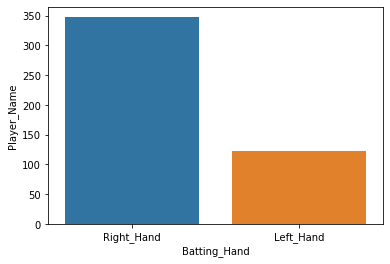

In [110]:
sns.barplot(players_df1.Batting_Hand,players_df1.Player_Name)

* It is observed that **348** players are play with their right hand and **123** players play with their left hand.

In [111]:
players_df2=players_data.groupby("Bowling_Skill")["Player_Name"].count().reset_index()

In [112]:
players_df2.sort_values(by="Player_Name",ascending=False,inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

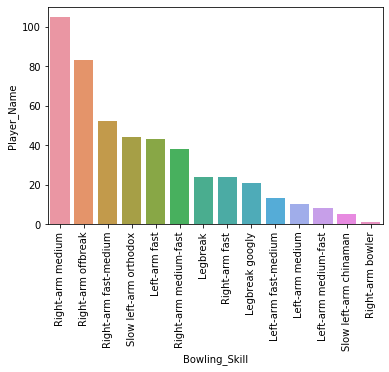

In [113]:
sns.barplot(players_df2.Bowling_Skill,players_df2.Player_Name)
plt.xticks(rotation=90)

* **105** players have **Right-arm medium** bowling skill.

<Figure size 10800x1440 with 0 Axes>

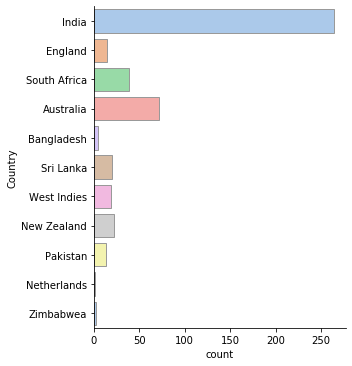

In [114]:
plt.figure(figsize=(150,20))
sns.catplot(y="Country", kind="count",
            palette="pastel", edgecolor=".6",
            data=players_data);


In [115]:
players_df3=players_data.groupby("Country")["Player_Name"].count().reset_index()

Text(0.5, 1.0, 'Pie Plot')

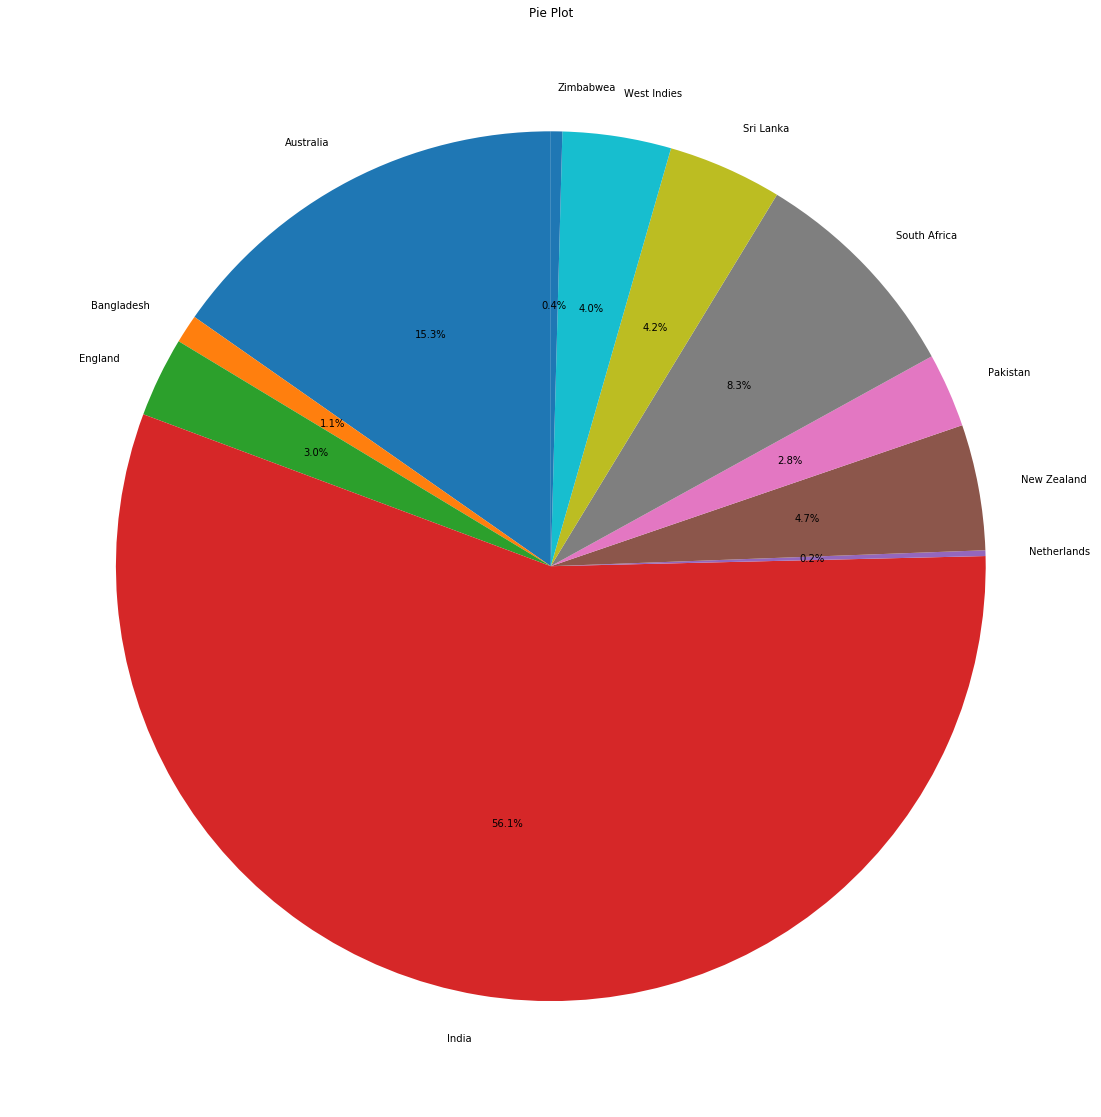

In [116]:
plt.figure(figsize=(20,20))
plt.pie(players_df3.Player_Name,labels=players_df3.Country,startangle=90,autopct='%1.1f%%')
plt.title('Pie Plot')

As we see,
* Most of the players are from **India** i.e. 264.
* After India, **Australia** has higher number of players than other countries i.e. 72.